In [4]:
import numpy
import collections
from tensorflow.python.framework import dtypes

from os import listdir
import os
from os.path import isfile, join
import numpy as np
import cv2

import matplotlib.pylab as plt
%matplotlib inline

from __future__ import division
from __future__ import print_function

import argparse
import sys

import glob

import tensorflow as tf

In [5]:
###From https://gist.github.com/ambodi/408301bc5bc07bc5afa8748513ab9477#file-dataset-py-L74

In [6]:
###Data from  https://www.kaggle.com/c/dogs-vs-cats/data

## Saving raw data to npy

#### Load data

In [7]:
#path to directory
path_train = 'raw_data/train/'
path_test = 'raw_data/test/'
img_size= 100

#get folder names
def directory_scan(path):
    dirlist = [ item for item in os.listdir(path) if os.path.isdir(os.path.join(path, item)) ]
    return dirlist

#build labels and image arrays, resize image to 100*100
def read_images_in_folder(dirlist, path):
    images=[]
    labels = []
    count = 0
    for i in range(len(dirlist)):
        image_stack = []
        for img in glob.glob(path+dirlist[i]+'/*jpg'):
            count=count+1
            labels.append(dirlist[i])
            IMG = cv2.imread(img)
            #RGB to grey scale
            IMG_2= cv2.cvtColor( IMG, cv2.COLOR_RGB2GRAY )
            #resize to 100*100
            im_resize = cv2.resize(IMG_2, (img_size, img_size), interpolation=cv2.INTER_CUBIC)
            images.append(im_resize)
        #np_images = np.array(image_stack)
        
    return images, labels, count

if __name__ == '__main__':
    dirlist_train = directory_scan(path_train)
    images_train,labels_train,count_train = read_images_in_folder(dirlist_train, path_train)
    dirlist_test = directory_scan(path_test)
    images_test,labels_test,count_test = read_images_in_folder(dirlist_test, path_test)

#save to file
np.save('npy/images_train',images_train)
np.save('npy/labels_train',labels_train)
np.save('npy/images_test',images_test)
np.save('npy/labels_test',labels_test)

print('There are '+ str(count_train) +' training images')
print('There are '+ str(count_test) +' testing images')

nb_img_train = count_train
nb_img_test = count_test

There are 1400 training images
There are 40 testing images


'cat'

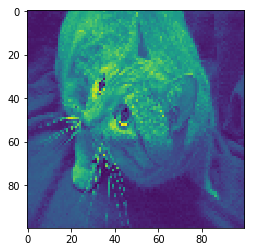

In [8]:
#LOAD TRAIN
#load images
train_images = np.load('npy/images_train.npy')
plt.imshow(train_images[100])

#load labels
train_labels = np.load('npy/labels_train.npy')
train_labels[1]

#LOAD TEST
#load images
test_images = np.load('npy/images_test.npy')
plt.imshow(test_images[10])

#load labels
test_labels = np.load('npy/labels_test.npy')
test_labels[1]

In [9]:
#prepare and reshape testing/training sets
#img_size = 100
#nb_img_train = 1400
#nb_img_test = 40

train_img = train_images.reshape((nb_img_train, img_size * img_size))
train_img = train_img.astype('float32') / 255

test_img = test_images.reshape((nb_img_test, img_size * img_size))
test_img = test_img.astype('float32') / 255

#### One Hot Encoding of Labels

In [10]:
#LABEL ONE HOT ENCODING
#Training
k=0
for i in range(len(dirlist_train)):
    for j in range(len(train_labels)):
        if(train_labels[j]==dirlist_train[i]):
            train_labels[j]=k
    k=k+1

#Testing
m=0
for l in range(len(dirlist_test)):
    for h in range(len(test_labels)):
        if(test_labels[h]==dirlist_test[l]):
            test_labels[h]=m
    m=m+1

In [11]:
from keras.utils import to_categorical

train_lab= to_categorical(train_labels)
test_lab = to_categorical(test_labels)

C:\Users\TempUser\Anaconda3\envs\tensorflow_1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Run Model on Data

In [23]:
from keras import models
from keras import layers

#initializes the model
network = models.Sequential()

#BUILD COMPUTATIONAL GRAPH
network.add(layers.Dense(200, activation='relu', input_shape=(100 * 100,)))

network.add(layers.Dense(300, activation='relu'))

network.add(layers.Dense(400, activation='relu'))

network.add(layers.Dense(len(dirlist_train), activation='softmax'))

#SETS PERFORMANCE METRICS
#network.compile(optimizer='Adam',
 #               loss='categorical_crossentropy',
  #              metrics=['accuracy'])

network.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#Run model
network.fit(train_img, train_lab, epochs=50, batch_size=80, shuffle=True)

Epoch 1/50
1400/1400 [==============================] - 2s 1ms/step - loss: 1.4115 - acc: 0.5079
Epoch 2/50
1400/1400 [==============================] - 1s 535us/step - loss: 0.7160 - acc: 0.5071
Epoch 3/50
1400/1400 [==============================] - 1s 537us/step - loss: 0.7103 - acc: 0.5629
Epoch 4/50
1400/1400 [==============================] - 1s 536us/step - loss: 0.7958 - acc: 0.4993
Epoch 5/50
1400/1400 [==============================] - 1s 553us/step - loss: 0.7263 - acc: 0.5421
Epoch 6/50
1400/1400 [==============================] - 1s 563us/step - loss: 0.7080 - acc: 0.5371
Epoch 7/50
1400/1400 [==============================] - 1s 562us/step - loss: 0.6812 - acc: 0.5807
Epoch 8/50
1400/1400 [==============================] - 1s 562us/step - loss: 0.6704 - acc: 0.5793
Epoch 9/50
1400/1400 [==============================] - 1s 559us/step - loss: 0.6869 - acc: 0.5721
Epoch 10/50
1400/1400 [==============================] - 1s 540us/step - loss: 0.6653 - acc: 0.5886
Epoch 11/50

In [194]:
test_loss, test_acc = network.evaluate(test_img, test_lab)

40/40 [==============================] - 0s 3ms/step


In [195]:
print('test_acc:', test_acc, 'test_loss', test_loss)

test_acc: 0.5 test_loss 8.059047722816468
